# Trabalho Final de Machine Learning Aplicado 1

Alunos:
*   Gian Giovanni Rodrigues da Silva
*   Jessyca Jordanna Barroso de Moraes
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves



**Using variables with correlation greater than 0.1 and less than 1.**


## Bibliotecas Utilizadas

In [ ]:
#!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib import colors as mcolors
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# 1 - Carregando o Dataset
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#paths
path_Dados_Teste = '/content/drive/Shareddrives/ml_aplicado_1/Dados_Teste.csv'
path_Dados_Treino = '/content/drive/Shareddrives/ml_aplicado_1/Dados_Treino.csv'
path_Template_Submissao = '/content/drive/Shareddrives/ml_aplicado_1/Template_Submissao.csv'
path_Dicionario_de_Dados =  '/content/drive/Shareddrives/ml_aplicado_1/Dicionario_de_Dados.csv'

In [ ]:
df_teste = pd.read_csv(path_Dados_Teste)

df_treino = pd.read_csv(path_Dados_Treino)

In [ ]:
df_teste.head(2)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,206833,19,37.0,27.109375,0,Caucasian,F,160.0,Floor,Floor,653,admit,Med-Surg ICU,4.277083,0,69.4,NaN,109.0,108.01,0,0,NaN,30.0,1.56,NaN,4.0,6.0,0.0,5.0,84.0,118.0,23.3,0,128.0,NaN,NaN,NaN,NaN,6.0,134.0,...,NaN,NaN,NaN,NaN,NaN,1.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,273200,86,47.0,28.071089,1,Caucasian,M,164.0,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.340278,0,75.5,NaN,308.0,1207.01,1,0,NaN,12.0,0.65,0.8,4.0,4.0,0.0,1.0,173.0,93.0,28.6,1,51.0,45.0,45.0,95.0,7.29,28.0,137.0,...,24.0,10.9,10.9,31.8,27.0,1.1,1.1,NaN,NaN,174.0,174.0,4.4,4.3,138.0,137.0,13.9,13.9,57.0,41.0,7.31,7.17,110.0,70.0,180.0,110.0,57.0,45.0,7.29,7.17,110.0,70.0,118.75,110.0,0,0,0,0,0,0,0


In [ ]:
df_treino.head(2)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.0,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1


# 2 - Explorando o dataset
---

In [ ]:
#pd.set_option("display.max.columns", None)
#pd.set_option('display.max_rows', None)

## 2.1 Dados de Treino

In [ ]:
df_treino.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117141 entries, 0 to 117140
Columns: 180 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(17), object(6)
memory usage: 160.9+ MB


### 2.1.1 Correlação entre variáveis

In [ ]:
# Dropando colunas ID's
dataset = df_treino.copy()
dataset.drop(columns = ['encounter_id', 'hospital_id', 'icu_id'], inplace = True)

In [ ]:
# Calculando a correlação
correlacoes = dataset.corr('spearman')
cor_variaveis = correlacoes['diabetes_mellitus'][(correlacoes['diabetes_mellitus'] > 0.1) & (correlacoes['diabetes_mellitus'] < 1)]

In [ ]:
cor_variaveis

bmi                  0.174972
weight               0.154157
arf_apache           0.106020
bun_apache           0.170309
creatinine_apache    0.154814
glucose_apache       0.322054
d1_bun_max           0.172092
d1_bun_min           0.154457
d1_creatinine_max    0.165567
d1_creatinine_min    0.151389
d1_glucose_max       0.407704
h1_bun_max           0.166357
h1_bun_min           0.166327
h1_creatinine_max    0.142053
h1_creatinine_min    0.142187
h1_glucose_max       0.316544
h1_glucose_min       0.297976
Name: diabetes_mellitus, dtype: float64

In [ ]:
cor_variaveis.index

Index(['bmi', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache',
       'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max',
       'd1_creatinine_min', 'd1_glucose_max', 'h1_bun_max', 'h1_bun_min',
       'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max',
       'h1_glucose_min'],
      dtype='object')

In [ ]:
df_treino_aux = df_treino[['bmi', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', 
                           'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 
                           'd1_creatinine_min', 'd1_glucose_max', 'h1_bun_max', 'h1_bun_min', 
                           'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 
                           'h1_glucose_min', 'diabetes_mellitus']].copy()

In [ ]:
df_treino_aux

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,diabetes_mellitus
0,22.732803,73.9,0,31.0,2.51,168.0,31.0,30.0,2.51,2.23,168.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,27.421875,70.2,0,9.0,0.56,145.0,11.0,9.0,0.71,0.56,145.0,9.0,9.0,0.56,0.56,145.0,143.0,1
2,31.952749,95.3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,22.635548,61.7,0,NaN,NaN,185.0,NaN,NaN,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,20.324301,55.4,0,7.0,0.73,182.0,8.0,7.0,0.86,0.73,182.0,7.0,7.0,0.73,0.73,182.0,167.0,0
117137,29.287256,90.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
117138,32.265371,102.0,0,30.0,2.43,346.0,31.0,30.0,2.65,2.41,346.0,NaN,NaN,NaN,NaN,NaN,NaN,1
117139,24.408579,83.9,0,NaN,NaN,137.0,45.0,45.0,2.21,2.21,156.0,NaN,NaN,NaN,NaN,NaN,NaN,0


### 2.2.2 Valores Nulos

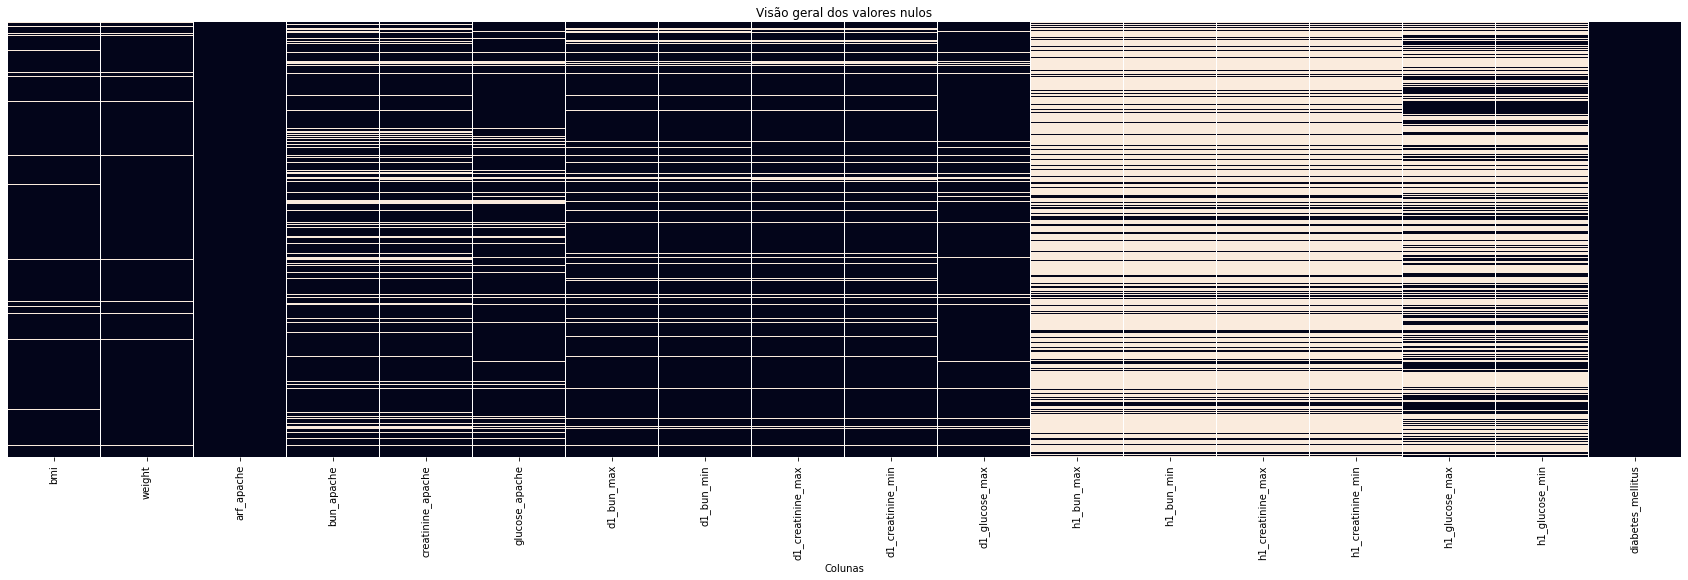

In [ ]:
# Visualizando valores nulos por coluna
plt.figure(figsize = (30,8))

sns.heatmap(df_treino_aux.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores nulos')
plt.xlabel('Colunas')
plt.show()

### 2.1.3 Estatísticas Descritivas

In [ ]:
# Estatísticas descritivas de todas as colunas do DF
df_treino_aux.describe(include = 'all')  

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,diabetes_mellitus
count,113098.000000,114019.000000,117141.000000,94322.000000,94779.000000,103956.000000,104805.000000,104805.000000,105204.000000,105204.000000,109754.000000,22647.000000,22647.000000,22832.000000,22832.000000,49588.000000,49588.000000,117141.000000
mean,29.108791,83.783195,0.027983,25.708483,1.480966,159.994442,25.571505,23.549491,1.493221,1.363453,174.076444,25.678832,25.657933,1.530321,1.528294,167.706244,158.910785,0.216440
std,8.279498,25.015740,0.164926,20.695235,1.545518,90.526343,20.495012,18.704232,1.528127,1.343419,86.366855,21.432506,21.418728,1.578627,1.576221,93.931760,88.230028,0.411819
min,14.844926,38.600000,0.000000,4.000000,0.300000,39.000000,4.000000,3.000000,0.340000,0.300000,73.000000,4.000000,4.000000,0.330000,0.330000,59.000000,42.000000,0.000000
25%,23.586485,66.500000,0.000000,13.000000,0.710000,97.000000,13.000000,12.000000,0.750000,0.710000,117.000000,13.000000,13.000000,0.780000,0.780000,111.000000,106.000000,0.000000
50%,27.555611,80.000000,0.000000,19.000000,0.970000,133.000000,19.000000,17.000000,1.000000,0.940000,150.000000,18.000000,18.000000,1.010000,1.010000,140.000000,134.000000,0.000000
75%,32.812500,96.820000,0.000000,31.000000,1.520000,195.000000,31.000000,29.000000,1.500000,1.400000,201.000000,30.000000,30.000000,1.540000,1.530000,189.000000,179.000000,0.000000
max,67.814990,186.000000,1.000000,127.000000,11.180000,598.700000,126.000000,113.090000,11.110000,9.937900,611.000000,135.000000,135.000000,11.604200,11.571000,695.045000,670.000000,1.000000


## 2.2 Dados de Teste

In [ ]:
df_teste.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,206833,19,37.0,27.109375,0,Caucasian,F,160.0,Floor,Floor,653,admit,Med-Surg ICU,4.277083,0,69.4,NaN,109.0,108.01,0,0,NaN,30.0,1.56,NaN,4.0,6.0,0.0,5.0,84.0,118.0,23.3,0,128.0,NaN,NaN,NaN,NaN,6.0,134.0,...,NaN,NaN,NaN,NaN,NaN,1.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,273200,86,47.0,28.071089,1,Caucasian,M,164.0,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.340278,0,75.5,NaN,308.0,1207.01,1,0,NaN,12.0,0.65,0.8,4.0,4.0,0.0,1.0,173.0,93.0,28.6,1,51.0,45.0,45.0,95.0,7.29,28.0,137.0,...,24.0,10.9,10.9,31.8,27.0,1.1,1.1,NaN,NaN,174.0,174.0,4.4,4.3,138.0,137.0,13.9,13.9,57.0,41.0,7.31,7.17,110.0,70.0,180.0,110.0,57.0,45.0,7.29,7.17,110.0,70.0,118.75,110.0,0,0,0,0,0,0,0
2,271053,79,74.0,21.661538,0,Caucasian,F,162.5,Acute Care/Floor,Floor,366,admit,Med-Surg ICU,2.694444,0,57.2,NaN,124.0,305.02,0,0,NaN,24.0,0.46,NaN,4.0,6.0,0.0,5.0,61.0,102.0,18.5,0,48.0,NaN,NaN,NaN,NaN,14.0,144.0,...,NaN,6.3,6.3,18.5,18.5,NaN,NaN,NaN,NaN,258.0,258.0,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,221599,120,18.0,17.617188,0,Caucasian,F,160.0,NaN,Accident & Emergency,1000,admit,CCU-CTICU,0.102083,0,45.1,NaN,120.0,407.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,103.0,NaN,0,54.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,177808,86,80.0,29.880373,0,Caucasian,F,162.6,Emergency Department,Accident & Emergency,1037,admit,SICU,0.114583,0,79.0,NaN,301.0,403.01,0,0,NaN,8.0,0.65,NaN,3.0,6.0,0.0,4.0,106.0,131.0,28.7,0,67.0,NaN,NaN,NaN,NaN,28.0,136.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13016 entries, 0 to 13015
Columns: 179 entries, encounter_id to solid_tumor_with_metastasis
dtypes: float64(157), int64(16), object(6)
memory usage: 17.8+ MB


In [ ]:
# Manter apenas as colunas com correlação entre 0.1 e 1
df_teste_aux = df_teste[['bmi', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', 
                         'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 
                         'd1_creatinine_min', 'd1_glucose_max', 'h1_bun_max', 'h1_bun_min', 
                         'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min']]\
               .copy()

In [ ]:
df_teste_aux

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min
0,27.109375,69.4,0,30.0,1.56,84.0,30.0,30.0,1.56,1.56,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1,28.071089,75.5,0,12.0,0.65,173.0,12.0,10.0,0.84,0.65,173.0,12.0,12.0,0.84,0.84,118.0,99.0
2,21.661538,57.2,0,24.0,0.46,61.0,24.0,24.0,0.46,0.46,185.0,NaN,NaN,NaN,NaN,185.0,64.0
3,17.617188,45.1,0,NaN,NaN,NaN,7.0,7.0,0.59,0.59,87.0,NaN,NaN,NaN,NaN,NaN,NaN
4,29.880373,79.0,0,8.0,0.65,106.0,8.0,7.0,0.69,0.65,117.0,NaN,NaN,NaN,NaN,106.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13011,23.087370,81.6,0,17.0,0.90,158.0,17.0,17.0,1.00,0.90,188.0,17.0,17.0,1.00,1.00,188.0,188.0
13012,27.343750,70.0,0,19.0,0.40,75.0,19.0,13.0,0.50,0.50,137.0,NaN,NaN,NaN,NaN,137.0,137.0
13013,28.586930,80.3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13014,28.770680,95.3,0,54.0,2.51,61.0,54.0,22.0,2.51,1.17,128.0,54.0,54.0,2.51,2.51,61.0,61.0


### 2.2.1 Valores Nulos

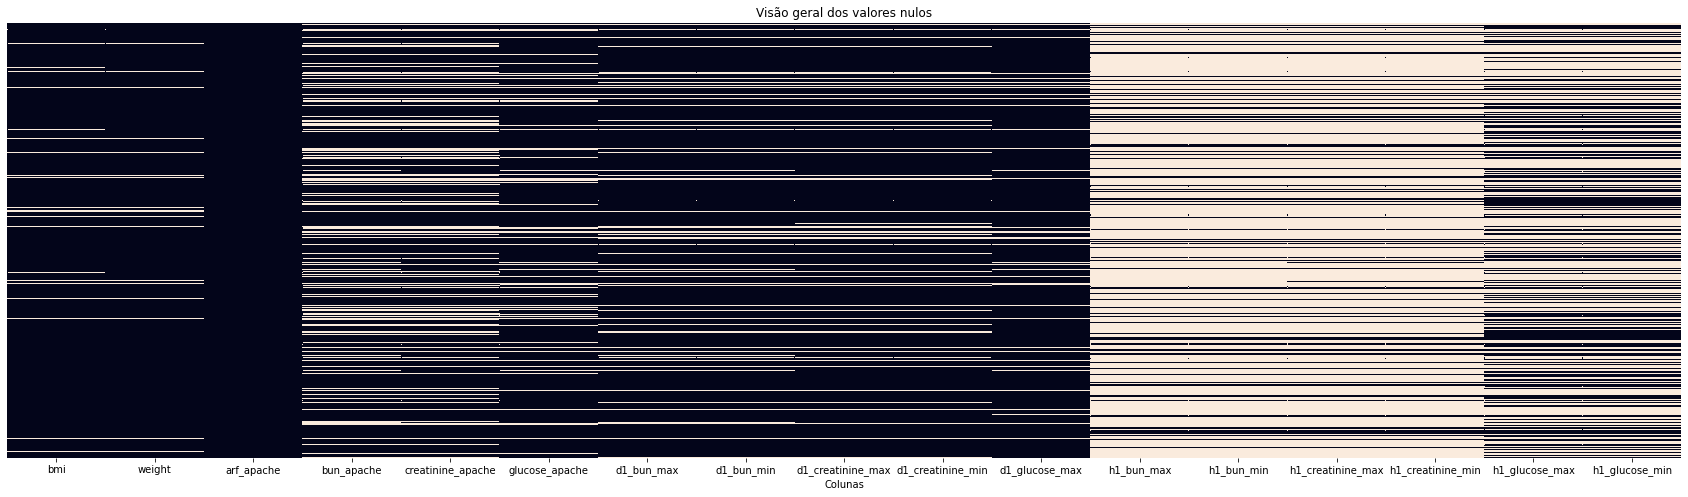

In [ ]:
# Visualizando valores nulos por coluna
plt.figure(figsize = (30,8))

sns.heatmap(df_teste_aux.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores nulos')
plt.xlabel('Colunas')
plt.show()

### 2.2.2 Estatísticas Descritivas

In [ ]:
# Estatísticas descritivas de todas as colunas do DF
df_teste_aux.describe(include = 'all')

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min
count,12569.000000,12675.000000,13016.000000,10424.000000,10496.000000,11505.000000,11618.000000,11618.000000,11680.000000,11680.000000,12160.000000,2520.000000,2520.000000,2541.000000,2541.000000,5496.000000,5496.000000
mean,29.123474,83.862256,0.028119,25.804825,1.487621,161.469431,25.644689,23.596217,1.496328,1.366875,174.811924,25.203333,25.143016,1.492987,1.488804,167.669973,158.890830
std,8.111063,24.484960,0.165320,20.643772,1.525574,92.260767,20.504942,18.746027,1.505817,1.325579,88.142048,20.876871,20.830142,1.519034,1.513509,94.954751,88.925238
min,14.844926,38.600000,0.000000,4.000000,0.300000,39.000000,4.000000,3.000000,0.340000,0.300000,73.000000,4.000000,4.000000,0.330000,0.330000,59.000000,42.000000
25%,23.709823,67.000000,0.000000,13.000000,0.710000,97.000000,13.000000,12.000000,0.760000,0.710000,117.000000,13.000000,13.000000,0.780000,0.780000,111.000000,107.000000
50%,27.626969,80.200000,0.000000,19.000000,0.980000,134.000000,19.000000,17.000000,1.000000,0.940000,149.000000,18.000000,18.000000,1.010000,1.010000,139.000000,134.000000
75%,32.757396,96.800000,0.000000,31.000000,1.562500,196.000000,31.000000,29.000000,1.540000,1.400000,200.000000,29.000000,29.000000,1.530000,1.530000,188.000000,178.000000
max,67.814990,186.000000,1.000000,127.000000,11.180000,598.700000,126.000000,113.090000,11.110000,9.937900,611.000000,135.000000,135.000000,11.604200,11.571000,695.045000,670.000000


# 3 - Modelos

Preparação dos dados para criação e aplicação dos modelos.

In [ ]:
# Trocando NaN por 0.0, em colunas do tipo float no df_treino_aux
for col in df_treino_aux.select_dtypes('float'):
  #media = float(np.mean(df_treino_aux[col]))
  #print(media)
  #df_treino_aux[col] = df_treino_aux[col].fillna(media)
  df_treino_aux[col] = df_treino_aux[col].fillna(0.0)

In [ ]:
df_treino_aux.head(2)

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,diabetes_mellitus
0,22.732803,73.9,0,31.0,2.51,168.0,31.0,30.0,2.51,2.23,168.0,0.0,0.0,0.00,0.00,0.0,0.0,1
1,27.421875,70.2,0,9.0,0.56,145.0,11.0,9.0,0.71,0.56,145.0,9.0,9.0,0.56,0.56,145.0,143.0,1


In [ ]:
# Trocando NaN por 0.0, em colunas do tipo float no df_teste_aux
for col in df_teste_aux.select_dtypes('float'):
  #media = float(np.mean(df_teste_aux[col]))
  #print(media)
  #df_teste_aux[col] = df_teste_aux[col].fillna(media)
  df_teste_aux[col] = df_teste_aux[col].fillna(0.0)

In [ ]:
df_teste_aux.head(2)

,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min
0,27.109375,69.4,0,30.0,1.56,84.0,30.0,30.0,1.56,1.56,112.0,0.0,0.0,0.00,0.00,0.0,0.0
1,28.071089,75.5,0,12.0,0.65,173.0,12.0,10.0,0.84,0.65,173.0,12.0,12.0,0.84,0.84,118.0,99.0


In [ ]:
# Dividindo df_treino_aux em treino e teste
X = df_treino_aux.loc[:,'bmi':'h1_glucose_min'].values
y = df_treino_aux['diabetes_mellitus'].values

## 3.1 Dados Balanceados

In [ ]:
df_treino_aux['diabetes_mellitus'].value_counts()

0    91787
1    25354
Name: diabetes_mellitus, dtype: int64

In [ ]:
# Contagem de classes
class_count_0, class_count_1 = df_treino_aux['diabetes_mellitus'].value_counts()

In [ ]:
# Separando classes
class_0 = df_treino_aux[df_treino_aux['diabetes_mellitus'] == 0]
class_1 = df_treino_aux[df_treino_aux['diabetes_mellitus'] == 1]
# print shape das classes
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (91787, 18)
class 1: (25354, 18)


#### 3.1.2 Random Under-Sampling

total class of 1 and 0:
 1    25354
0    25354
Name: diabetes_mellitus, dtype: int64


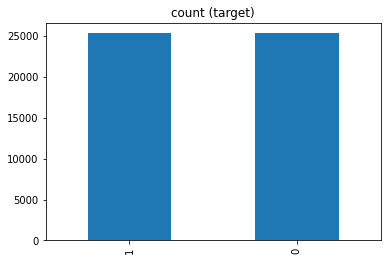

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis = 0)

print("total class of 1 and 0:\n", test_under['diabetes_mellitus'].value_counts())

# gráfico de contagem das classes depois do under-sampeling
test_under['diabetes_mellitus'].value_counts().plot(kind = 'bar', title = 'count (target)')

In [ ]:
# Separando dados de treino
y_train_under = test_under.diabetes_mellitus
X_train_under = test_under.drop('diabetes_mellitus', axis = 1)

#### 3.1.3 Random Over-Sampling

total class of 1 and 0:
 1    91787
0    91787
Name: diabetes_mellitus, dtype: int64


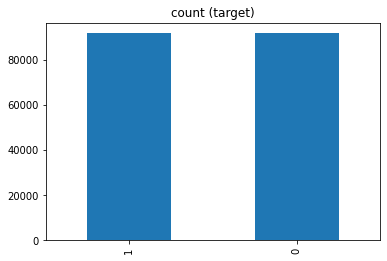

In [ ]:
class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over, class_0], axis = 0)

print("total class of 1 and 0:\n", test_over['diabetes_mellitus'].value_counts())

# gráfico de contagem das classes depois do over-sampeling
test_over['diabetes_mellitus'].value_counts().plot(kind = 'bar', title = 'count (target)')

In [ ]:
y_train_over = test_over.diabetes_mellitus
X_train_over = test_over.drop('diabetes_mellitus', axis = 1)

## 3.2 Dados Desbalanceados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

Amostras de treino:
 * X_train: (87855, 17)
 * y_train: (87855,)
Amostras de teste:
 * X_test: (29286, 17)
 * y_test: (29286,)


## 3.3 Regressão Logística

### 3.3.1 Criação do Modelo

In [ ]:
reglog_model = LogisticRegression(solver = 'newton-cg', random_state = 0)

### 3.3.2 Aplicação do Modelo

#### 3.3.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
reglog_model.fit(X_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, reglog_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.73


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.7629096558847884

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, reglog_model.predict_proba(X_train_under)[:, 1])

0.797340085622888

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.7957341862707314

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.70971551, 0.29028449],
       [0.57621397, 0.42378603],
       [0.54557881, 0.45442119],
       ...,
       [0.90942374, 0.09057626],
       [0.74483466, 0.25516534],
       [0.63473384, 0.36526616]])

In [ ]:
y_pred[:,1]

array([0.29028449, 0.42378603, 0.45442119, ..., 0.09057626, 0.25516534,
       0.36526616])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_under_jess.csv', index = False)

#### 3.3.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
reglog_model.fit(X_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, reglog_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.73


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.7619193962831118

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, reglog_model.predict_proba(X_train_over)[:, 1])

0.7983503056265477

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.7957035148476399

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.71167417, 0.28832583],
       [0.57374118, 0.42625882],
       [0.51370715, 0.48629285],
       ...,
       [0.90947083, 0.09052917],
       [0.74208452, 0.25791548],
       [0.63074901, 0.36925099]])

In [ ]:
y_pred[:,1]

array([0.28832583, 0.42625882, 0.48629285, ..., 0.09052917, 0.25791548,
       0.36925099])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_over_jess.csv', index = False)

#### 3.3.2.3 Em dados desbalanceados

In [ ]:
reglog_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
for f, c in zip(df_treino_aux.columns[1:], reglog_model.coef_[0].tolist()):
    print(f'{f} = {c}')

print(f'CONST = {float(reglog_model.intercept_)}')

weight = 0.019650609729280226
arf_apache = 0.0049379431794490634
bun_apache = 1.3239553748276816
creatinine_apache = -0.0009325416429483813
glucose_apache = 0.021951370169827154
d1_bun_max = 0.00020310890799927654
d1_bun_min = 0.0008443086205353847
d1_creatinine_max = 0.008132504292421213
d1_creatinine_min = -0.2680140369524953
d1_glucose_max = 0.2396197673160811
h1_bun_max = 0.009569447369551218
h1_bun_min = -0.3573155562112975
h1_creatinine_max = 0.3543243682163313
h1_creatinine_min = -0.6891188442696025
h1_glucose_max = 0.7026885346405485
h1_glucose_min = 0.0015186027611799875
diabetes_mellitus = -0.0009053569521097857
CONST = -4.2614997050496815


In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, reglog_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.8


In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, reglog_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.6


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.8037920113367651

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, reglog_model.predict_proba(X_train_under)[:, 1])

0.7956636504029657

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.7939530252711171

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.8875518 , 0.1124482 ],
       [0.82580654, 0.17419346],
       [0.79536156, 0.20463844],
       ...,
       [0.96453953, 0.03546047],
       [0.90390972, 0.09609028],
       [0.85126038, 0.14873962]])

In [ ]:
y_pred[:,1]

array([0.1124482 , 0.17419346, 0.20463844, ..., 0.03546047, 0.09609028,
       0.14873962])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_jess.csv', index = False)

## 3.4 KNN - Classifier

### 3.4.1 Criação do Modelo

In [ ]:
#knn_model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=13, weights='distance', p=1, metric='chebyshev', 
                                 leaf_size=40, algorithm='kd_tree')

### 3.4.2 Aplicação do Modelo

#### 3.4.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
knn_model.fit(X_train_under, y_train_under)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=1,
                     weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, knn_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.85


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.8499585969045851

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, knn_model.predict_proba(X_train_under)[:, 1])

0.9996828010737523

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.9958551041059491

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.76392325, 0.23607675],
       [0.35713468, 0.64286532],
       [0.73898225, 0.26101775],
       ...,
       [0.        , 1.        ],
       [0.5640365 , 0.4359635 ],
       [0.69487733, 0.30512267]])

In [ ]:
y_pred[:,1]

array([0.23607675, 0.64286532, 0.26101775, ..., 1.        , 0.4359635 ,
       0.30512267])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_under_jess.csv', index = False)

#### 3.4.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
knn_model.fit(X_train_over, y_train_over)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=1,
                     weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, knn_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 1.0


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.9947072331634526

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, knn_model.predict_proba(X_train_over)[:, 1])

0.9984006697315849

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.997659655693994

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.45823394, 0.54176606],
       [0.51084161, 0.48915839],
       [0.50878272, 0.49121728],
       ...,
       [0.1       , 0.9       ],
       [0.59322219, 0.40677781],
       [0.48873882, 0.51126118]])

In [ ]:
y_pred[:,1]

array([0.54176606, 0.48915839, 0.49121728, ..., 0.9       , 0.40677781,
       0.51126118])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_over_jess.csv', index = False)

#### 3.4.2.3 Em dados desbalanceados

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=1,
                     weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.9489504101894298

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, knn_model.predict_proba(X_train)[:, 1])

0.9996041691808402

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.7791358632705279

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.84230291, 0.15769709],
       [0.62242368, 0.37757632],
       [0.93129996, 0.06870004],
       ...,
       [0.5       , 0.5       ],
       [0.78911918, 0.21088082],
       [0.83678061, 0.16321939]])

In [ ]:
y_pred[:,1]

array([0.15769709, 0.37757632, 0.06870004, ..., 0.5       , 0.21088082,
       0.16321939])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_jess.csv', index = False)

## 3.5 Árvores de Decisão

### 3.5.1 Criação do Modelo

In [ ]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 7, 
                                    min_samples_split = 2,
                                    random_state = 0)

### 3.5.2 Aplicação do Modelo

#### 3.5.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
tree_model.fit(X_train_under, y_train_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, tree_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.74


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.7382129228878018

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, tree_model.predict_proba(X_train_under)[:, 1])

0.8148677058325438

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.8095637809720642

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.81388013, 0.18611987],
       [0.43263647, 0.56736353],
       [0.73076923, 0.26923077],
       ...,
       [0.83896848, 0.16103152],
       [0.58064516, 0.41935484],
       [0.52112676, 0.47887324]])

In [ ]:
y_pred[:,1]

array([0.18611987, 0.56736353, 0.26923077, ..., 0.16103152, 0.41935484,
       0.47887324])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_under_jess.csv', index = False)

#### 3.5.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
tree_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, tree_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.74


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.73


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.7366933866024705

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, tree_model.predict_proba(X_train_over)[:, 1])

0.8137306328351838

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.812234935028727

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.66359164, 0.33640836],
       [0.55518047, 0.44481953],
       [0.69353948, 0.30646052],
       ...,
       [0.83630858, 0.16369142],
       [0.5539749 , 0.4460251 ],
       [0.30645161, 0.69354839]])

In [ ]:
y_pred[:,1]

array([0.33640836, 0.44481953, 0.30646052, ..., 0.16369142, 0.4460251 ,
       0.69354839])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_over_jess.csv', index = False)

#### 3.5.2.3 Em dados desbalanceados

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.81


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.8099213768023151

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, tree_model.predict_proba(X_train)[:, 1])

0.8153266087296644

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.8014959699802651

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.85260116, 0.14739884],
       [0.78703704, 0.21296296],
       [0.860038  , 0.139962  ],
       ...,
       [0.94971942, 0.05028058],
       [0.90309822, 0.09690178],
       [0.61188811, 0.38811189]])

In [ ]:
y_pred[:,1]

array([0.14739884, 0.21296296, 0.139962  , ..., 0.05028058, 0.09690178,
       0.38811189])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_jess.csv', index = False)

## 3.6 Soft Voting

### 3.6.1 Criação do Modelo

In [ ]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 20, 
                                    min_samples_split = 2,
                                    random_state = 0)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 30, 
                                             criterion = 'entropy',
                                             max_depth = 15,
                                             min_samples_split = 2,
                                             random_state = 0)

In [ ]:
soft_voting_model = VotingClassifier(estimators = [('random_forest', random_forest_model),
                                                   ('knn_model', knn_model),
                                                   ('tree_model', tree_model)], 
                                     voting = 'soft')

In [ ]:
#soft_voting_model = VotingClassifier(estimators = [('logistic_model', reglog_model),
#                                                   ('knn_model', knn_model),
#                                                   ('tree_model', tree_model)], 
#                                     voting = 'soft')

### 3.6.2 Aplicação do Modelo

#### 3.6.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
soft_voting_model.fit(X_train_under, y_train_under)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, soft_voting_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.98


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.83


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.8291546085486721

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, soft_voting_model.predict_proba(X_train_under)[:, 1])

0.9989969506739214

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.9674689335562087

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.81525255, 0.18474745],
       [0.51565132, 0.48434868],
       [0.79877316, 0.20122684],
       ...,
       [0.27686959, 0.72313041],
       [0.34763119, 0.65236881],
       [0.36418239, 0.63581761]])

In [ ]:
y_pred[:,1]

array([0.18474745, 0.48434868, 0.20122684, ..., 0.72313041, 0.65236881,
       0.63581761])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_under_jess.csv', index = False)

#### 3.6.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
soft_voting_model.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, soft_voting_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.98


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.97


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.9697458618246387

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, soft_voting_model.predict_proba(X_train_over)[:, 1])

0.998965311012762

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.9969591025599657

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.72887336, 0.27112664],
       [0.56804283, 0.43195717],
       [0.74282287, 0.25717713],
       ...,
       [0.55627191, 0.44372809],
       [0.39811433, 0.60188567],
       [0.6364864 , 0.3635136 ]])

In [ ]:
y_pred[:,1]

array([0.27112664, 0.43195717, 0.25717713, ..., 0.44372809, 0.60188567,
       0.3635136 ])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_over_jess.csv', index = False)

#### 3.6.2.3 Em dados desbalanceados

In [ ]:
soft_voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=15,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, soft_voting_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.99


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.9379124303190173

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, soft_voting_model.predict_proba(X_train)[:, 1])

0.9991511290999266

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.7904087584978521

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.57658147, 0.42341853],
       [0.80445033, 0.19554967],
       [0.90588701, 0.09411299],
       ...,
       [0.65043555, 0.34956445],
       [0.89512739, 0.10487261],
       [0.89363152, 0.10636848]])

In [ ]:
y_pred[:,1]

array([0.42341853, 0.19554967, 0.09411299, ..., 0.34956445, 0.10487261,
       0.10636848])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_jess.csv', index = False)

## 3.7 Florestas aleatórias

### 3.7.1 Criação do Modelo

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 30, 
                                             criterion = 'entropy',
                                             max_depth = 15,
                                             min_samples_split = 2,
                                             random_state = 0)

### 3.7.2 Aplicação do Modelo

#### 3.7.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
random_forest_model.fit(X_train_under, y_train_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, random_forest_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.87


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.79


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.7919088961166457

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, random_forest_model.predict_proba(X_train_under)[:, 1])

0.9434808507137264

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.8945904462774302

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.6818344 , 0.3181656 ],
       [0.57870816, 0.42129184],
       [0.65733723, 0.34266277],
       ...,
       [0.83060878, 0.16939122],
       [0.47885708, 0.52114292],
       [0.39766984, 0.60233016]])

In [ ]:
y_pred[:,1]

array([0.3181656 , 0.42129184, 0.34266277, ..., 0.16939122, 0.52114292,
       0.60233016])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_under_jess.csv', index = False)

#### 3.7.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
random_forest_model.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, random_forest_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.87


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.85


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.8556269794521133

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, random_forest_model.predict_proba(X_train_over)[:, 1])

0.942588006780062

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.9327444906179828

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.72838614, 0.27161386],
       [0.67635283, 0.32364717],
       [0.7196859 , 0.2803141 ],
       ...,
       [0.76866489, 0.23133511],
       [0.6011208 , 0.3988792 ],
       [0.42072038, 0.57927962]])

In [ ]:
y_pred[:,1]

array([0.27161386, 0.32364717, 0.2803141 , ..., 0.23133511, 0.3988792 ,
       0.57927962])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_over_jess.csv', index = False)

#### 3.7.2.3 Em dados desbalanceados

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, random_forest_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.9


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.8752016800266346

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, random_forest_model.predict_proba(X_train)[:, 1])

0.9386474405406395

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.809698858251092

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.8874415 , 0.1125585 ],
       [0.7909273 , 0.2090727 ],
       [0.90230311, 0.09769689],
       ...,
       [0.95130664, 0.04869336],
       [0.89626299, 0.10373701],
       [0.84411396, 0.15588604]])

In [ ]:
y_pred[:,1]

array([0.1125585 , 0.2090727 , 0.09769689, ..., 0.04869336, 0.10373701,
       0.15588604])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_jess.csv', index = False)

## 3.8 Bagging

### 3.8.1 Criação do Modelo

In [ ]:
bagging_model = BaggingClassifier(KNeighborsClassifier(n_neighbors = 3),
                                  n_estimators = 50,
                                  max_samples = 200)

### 3.8.2 Aplicação do Modelo

#### 3.8.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
bagging_model.fit(X_train_under, y_train_under)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=200, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, bagging_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.73


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.7567290700950137

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, bagging_model.predict_proba(X_train_under)[:, 1])

0.7977069146729125

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.7972492184229596

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.84      , 0.16      ],
       [0.54      , 0.46      ],
       [0.46666667, 0.53333333],
       ...,
       [0.78      , 0.22      ],
       [0.55333333, 0.44666667],
       [0.68666667, 0.31333333]])

In [ ]:
y_pred[:,1]

array([0.16      , 0.46      , 0.53333333, ..., 0.22      , 0.44666667,
       0.31333333])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_under_jess.csv', index = False)

#### 3.8.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
bagging_model.fit(X_train_over, y_train_over)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=200, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, bagging_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.73


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.7566522396086767

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, bagging_model.predict_proba(X_train_over)[:, 1])

0.7997554188055567

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.7988635802345803

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.82666667, 0.17333333],
       [0.61333333, 0.38666667],
       [0.42666667, 0.57333333],
       ...,
       [0.86      , 0.14      ],
       [0.54      , 0.46      ],
       [0.72666667, 0.27333333]])

In [ ]:
y_pred[:,1]

array([0.17333333, 0.38666667, 0.57333333, ..., 0.14      , 0.46      ,
       0.27333333])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_over_jess.csv', index = False)

#### 3.8.2.3 Em dados desbalanceados

In [ ]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=200, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, bagging_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.8


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.8029639494284665

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, bagging_model.predict_proba(X_train)[:, 1])

0.8002076713551094

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.796300847377886

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.92      , 0.08      ],
       [0.78      , 0.22      ],
       [0.74      , 0.26      ],
       ...,
       [0.91333333, 0.08666667],
       [0.86      , 0.14      ],
       [0.88      , 0.12      ]])

In [ ]:
y_pred[:,1]

array([0.08      , 0.22      , 0.26      , ..., 0.08666667, 0.14      ,
       0.12      ])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_jess.csv', index = False)

## 3.9 Ada Boost

### 3.9.1 Criação do Modelo

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 500, 
                               learning_rate = 0.5)

### 3.9.2 Aplicação do Modelo

#### 3.9.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
ada_model.fit(X_train_under, y_train_under)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=500, random_state=None)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, ada_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.75


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.7492594394789186

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, ada_model.predict_proba(X_train_under)[:, 1])

0.8187831350126851

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.8170279115962784

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.50071392, 0.49928608],
       [0.50054975, 0.49945025],
       [0.49970075, 0.50029925],
       ...,
       [0.50127388, 0.49872612],
       [0.50065955, 0.49934045],
       [0.50020413, 0.49979587]])

In [ ]:
y_pred[:,1]

array([0.49928608, 0.49945025, 0.50029925, ..., 0.49872612, 0.49934045,
       0.49979587])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_under_jess.csv', index = False)

#### 3.9.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
ada_model.fit(X_train_over, y_train_over)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=500, random_state=None)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, ada_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.75


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.7494301738930007

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, ada_model.predict_proba(X_train_over)[:, 1])

0.8185466249626309

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.8173508116029675

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.50072347, 0.49927653],
       [0.50049453, 0.49950547],
       [0.49960217, 0.50039783],
       ...,
       [0.50142963, 0.49857037],
       [0.50084104, 0.49915896],
       [0.50001213, 0.49998787]])

In [ ]:
y_pred[:,1]

array([0.49927653, 0.49950547, 0.50039783, ..., 0.49857037, 0.49915896,
       0.49998787])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_over_jess.csv', index = False)

#### 3.9.2.3 Em dados desbalanceados

In [ ]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=500, random_state=None)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, ada_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.81


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.8085640382103618

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, ada_model.predict_proba(X_train)[:, 1])

0.8202722972646792

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.8148482708957588

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.5019219 , 0.4980781 ],
       [0.50179111, 0.49820889],
       [0.50094301, 0.49905699],
       ...,
       [0.50278418, 0.49721582],
       [0.50192856, 0.49807144],
       [0.50151536, 0.49848464]])

In [ ]:
y_pred[:,1]

array([0.4980781 , 0.49820889, 0.49905699, ..., 0.49721582, 0.49807144,
       0.49848464])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_jess.csv', index = False)

## 3.10 Multilayer Perceptron

### 3.10.1 Criação do Modelo

In [ ]:
mlp_model = MLPClassifier(max_iter = 600,
                          random_state = 0,
                          verbose = 0)

### 3.10.2 Aplicação do Modelo

#### 3.10.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
mlp_model.fit(X_train_under, y_train_under)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, mlp_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.74


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.75


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.7533826755790031

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, mlp_model.predict_proba(X_train_under)[:, 1])

0.8092291740109376

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.806617814281824

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.63402798, 0.36597202],
       [0.6402848 , 0.3597152 ],
       [0.67557143, 0.32442857],
       ...,
       [0.8558923 , 0.1441077 ],
       [0.38957341, 0.61042659],
       [0.6390564 , 0.3609436 ]])

In [ ]:
y_pred[:,1]

array([0.36597202, 0.3597152 , 0.32442857, ..., 0.1441077 , 0.61042659,
       0.3609436 ])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_under_jess.csv', index = False)

#### 3.10.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
mlp_model.fit(X_train_over, y_train_over)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, mlp_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.7602461990251065

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, mlp_model.predict_proba(X_train_over)[:, 1])

0.8232004022193682

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.8213082856126512

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.68041304, 0.31958696],
       [0.56653884, 0.43346116],
       [0.60739338, 0.39260662],
       ...,
       [0.85643434, 0.14356566],
       [0.65711514, 0.34288486],
       [0.58308561, 0.41691439]])

In [ ]:
y_pred[:,1]

array([0.31958696, 0.43346116, 0.39260662, ..., 0.14356566, 0.34288486,
       0.41691439])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_over_jess.csv', index = False)

#### 3.10.2.3 Em dados desbalanceados

In [ ]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, mlp_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.81


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.8065408354034881

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, mlp_model.predict_proba(X_train)[:, 1])

0.8164437788083722

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.8069988780327086

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.86137749, 0.13862251],
       [0.71130751, 0.28869249],
       [0.71884396, 0.28115604],
       ...,
       [0.94793693, 0.05206307],
       [0.73706289, 0.26293711],
       [0.78696963, 0.21303037]])

In [ ]:
y_pred[:,1]

array([0.13862251, 0.28869249, 0.28115604, ..., 0.05206307, 0.26293711,
       0.21303037])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_jess.csv', index = False)

# OBSOLETOS (NÃO APAGAR AINDA)

### 2.1.1 Mudanças de Tipos

In [ ]:
#df_treino.dtypes

In [ ]:
# Convertendo variáveis ID de inteiro para string
#df_treino[['encounter_id', 'hospital_id', 'icu_id']] = df_treino[['encounter_id', 'hospital_id', 'icu_id']].astype(str)

In [ ]:
#df_treino[['encounter_id', 'hospital_id', 'icu_id']].dtypes

In [ ]:
#df_treino['age'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_treino['age'] = df_treino['age'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_treino['age'][0]

In [ ]:
#df_treino['gcs_unable_apache'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_treino['gcs_unable_apache'] = df_treino['gcs_unable_apache'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_treino['gcs_unable_apache'][0]

### 2.2.2 Mudanças de Tipos

In [ ]:
#f_teste.dtypes

In [ ]:
# Convertendo variáveis ID de inteiro para string
#df_teste[['encounter_id', 'hospital_id', 'icu_id']] = df_teste[['encounter_id', 'hospital_id', 'icu_id']].astype(str)

In [ ]:
#df_teste[['encounter_id', 'hospital_id', 'icu_id']].dtypes

In [ ]:
#df_teste['age'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_teste['age'] = df_teste['age'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_teste['age'][0]

In [ ]:
#df_teste['gcs_unable_apache'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_teste['gcs_unable_apache'] = df_teste['gcs_unable_apache'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_teste['gcs_unable_apache'][0]